In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputfile='./Top10.xlsx'
data=pd.read_excel(inputfile,dtype={'TradingDate':np.datetime64,'Symbol':str})
data=data[['TradingDate','Symbol','ShortName','NetInflow']]

In [4]:
data['operation']=np.where(data['NetInflow']>0,1,-1)

In [5]:
inputfile1='./TRD_Dalyr1.xlsx'
stockmarket=pd.read_excel(inputfile1,dtype={'TradingDate':np.datetime64,'Symbol':str})

In [6]:
inputfile2='E:./TRD_Index1.xlsx'
shaindex=pd.read_excel(inputfile2,dtype={'TradingDate':np.datetime64,'indexcode':str})

In [18]:
df=pd.merge(stockmarket,data,how='outer',on=['TradingDate','Symbol'])
df1=pd.merge(df,shaindex,how='left',on='TradingDate')
df1['operation']=np.where(pd.isnull(df1['NetInflow']),0,df1['operation'])
df1['stockoperation']=np.where(pd.isnull(df1['NetInflow']),1,df1['operation'])
df1['anti']=np.where(df1.operation*df1.Retindex<0,1,0)
del df

In [19]:
df1

,Symbol,TradingDate,Opnprc,close,Dretnd,ShortName,NetInflow,operation,indexcode,Opnindex,Clsindex,Retindex,stockoperation,anti
0,000001,2014-11-18,10.74,10.61,-0.013941,NaN,NaN,0.0,000001,2474.182,2456.366,-0.007131,1.0,0
1,000001,2014-11-19,10.60,10.63,0.001885,NaN,NaN,0.0,000001,2452.150,2450.986,-0.002190,1.0,0
2,000001,2014-11-20,10.58,10.63,0.000000,NaN,NaN,0.0,000001,2443.276,2452.660,0.000683,1.0,0
3,000001,2014-11-21,10.62,10.80,0.015992,NaN,NaN,0.0,000001,2452.635,2486.791,0.013916,1.0,0
4,000001,2014-11-24,10.61,10.78,-0.001852,NaN,NaN,0.0,000001,2505.532,2532.879,0.018533,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318280,603993,2018-09-14,4.43,4.43,0.000000,NaN,NaN,0.0,000001,2688.779,2681.643,-0.001837,1.0,0
318281,603993,2018-09-17,4.40,4.27,-0.036117,NaN,NaN,0.0,000001,2671.291,2651.789,-0.011133,1.0,0
318282,603993,2018-09-18,4.25,4.40,0.030445,NaN,NaN,0.0,000001,2644.296,2699.950,0.018162,1.0,0
318283,603993,2018-09-19,4.40,4.48,0.018182,NaN,NaN,0.0,000001,2694.799,2730.850,0.011445,1.0,0


In [9]:
df1['longoperation']=np.where(df1['operation'].shift(1)==1,1,df1['operation'])
df1['longoperation']=np.where(df1['operation'].shift(2)==1,1,df1['longoperation'])
df1['longoperation']=np.where(df1['operation'].shift(1)==-1,-1,df1['longoperation'])
df1['longoperation']=np.where(df1['operation'].shift(2)==-1,-1,df1['longoperation'])
df1['longoperation']=np.where(df1['Symbol']!=df1['Symbol'].shift(1),df1['operation'],df1['longoperation'])
df1['longoperation']=np.where(df1['operation']-df1['longoperation']==2,1,df1['longoperation'])
df1['longoperation']=np.where(df1['operation']-df1['longoperation']==-2,-1,df1['longoperation'])
df1['longoperation']=np.where(df1['operation']+df1['operation'].shift(1)==2,2,df1['longoperation'])
df1['longoperation']=np.where(df1['operation']+df1['operation'].shift(1)==-2,-2,df1['longoperation'])

In [10]:
df1['mediumoperation']=np.where(df1['operation'].shift(1)==1,1,df1['operation'])
df1['mediumoperation']=np.where(df1['operation'].shift(1)==-1,-1,df1['mediumoperation'])
df1['mediumoperation']=np.where(df1['Symbol']!=df1['Symbol'].shift(1),df1['operation'],df1['mediumoperation'])
df1['mediumoperation']=np.where(df1['operation']-df1['mediumoperation']==2,1,df1['mediumoperation'])
df1['mediumoperation']=np.where(df1['operation']-df1['mediumoperation']==-2,-1,df1['mediumoperation'])
df1['mediumoperation']=np.where(df1['operation']+df1['operation'].shift(1)==2,2,df1['mediumoperation'])
df1['mediumoperation']=np.where(df1['operation']+df1['operation'].shift(1)==-2,-2,df1['mediumoperation'])

In [20]:
df1['strategygain']=['']*len(df1)
for ticker in df1['Symbol'].drop_duplicates().values.tolist():
    df1['strategygain']=np.where(df1['Symbol']==ticker,(df1['close']-df1['close'].shift(1))*df1['operation'].shift(1),df1['strategygain'])

In [13]:
df1['stockstrategygain']=['']*318285
for ticker in df1['Symbol'].drop_duplicates().values.tolist():
    df1['stockstrategygain']=np.where(df1['Symbol']==ticker,(df1['close']-df1['close'].shift(1))*df1['stockoperation'].shift(1),df1['stockstrategygain'])

In [14]:
df1['longstrategygain']=['']*318285
for ticker in df1['Symbol'].drop_duplicates().values.tolist():
    df1['longstrategygain']=np.where(df1['Symbol']==ticker,(df1['close']-df1['close'].shift(1))*df1['longoperation'].shift(1),df1['longstrategygain'])

In [15]:
df1['mediumstrategygain']=['']*318285
for ticker in df1['Symbol'].drop_duplicates().values.tolist():
    df1['mediumstrategygain']=np.where(df1['Symbol']==ticker,(df1['close']-df1['close'].shift(1))*df1['mediumoperation'].shift(1),df1['mediumstrategygain'])

In [16]:
df1['antistrategygain']=['']*318285
for ticker in df1['Symbol'].drop_duplicates().values.tolist():
    df1['antistrategygain']=np.where(df1['Symbol']==ticker,(df1['close']-df1['close'].shift(1))*df1['longoperation'].shift(1)*df1.anti.shift(1),df1['antistrategygain'])

In [17]:
df1.strategygain=np.where(pd.isnull(df1.strategygain),0,df1.strategygain)
df1.stockstrategygain=np.where(pd.isnull(df1.stockstrategygain),0,df1.stockstrategygain)
df1.longstrategygain=np.where(pd.isnull(df1.longstrategygain),0,df1.longstrategygain)
df1.mediumstrategygain=np.where(pd.isnull(df1.mediumstrategygain),0,df1.mediumstrategygain)
df1.antistrategygain=np.where(pd.isnull(df1.antistrategygain),0,df1.antistrategygain)
df1

,Symbol,TradingDate,Opnprc,close,Dretnd,ShortName,NetInflow,operation,indexcode,Opnindex,...,Retindex,stockoperation,anti,longoperation,mediumoperation,strategygain,stockstrategygain,longstrategygain,mediumstrategygain,antistrategygain
0,000001,2014-11-18,10.74,10.61,-0.013941,NaN,NaN,0.0,000001,2474.182,...,-0.007131,1.0,0,0.0,0.0,0,0,0,0,0
1,000001,2014-11-19,10.60,10.63,0.001885,NaN,NaN,0.0,000001,2452.150,...,-0.002190,1.0,0,0.0,0.0,0,0.02,0,0,0
2,000001,2014-11-20,10.58,10.63,0.000000,NaN,NaN,0.0,000001,2443.276,...,0.000683,1.0,0,0.0,0.0,0,0,0,0,0
3,000001,2014-11-21,10.62,10.80,0.015992,NaN,NaN,0.0,000001,2452.635,...,0.013916,1.0,0,0.0,0.0,0,0.17,0,0,0
4,000001,2014-11-24,10.61,10.78,-0.001852,NaN,NaN,0.0,000001,2505.532,...,0.018533,1.0,0,0.0,0.0,-0,-0.02,-0,-0,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318280,603993,2018-09-14,4.43,4.43,0.000000,NaN,NaN,0.0,000001,2688.779,...,-0.001837,1.0,0,0.0,0.0,0,0,0,0,0
318281,603993,2018-09-17,4.40,4.27,-0.036117,NaN,NaN,0.0,000001,2671.291,...,-0.011133,1.0,0,0.0,0.0,-0,-0.16,-0,-0,-0
318282,603993,2018-09-18,4.25,4.40,0.030445,NaN,NaN,0.0,000001,2644.296,...,0.018162,1.0,0,0.0,0.0,0,0.13,0,0,0
318283,603993,2018-09-19,4.40,4.48,0.018182,NaN,NaN,0.0,000001,2694.799,...,0.011445,1.0,0,0.0,0.0,0,0.08,0,0,0


In [153]:
df_group1=df1[['TradingDate','close']].groupby('TradingDate').sum()
df_group2=df1[['TradingDate','strategygain','stockstrategygain']].groupby('TradingDate').sum()
df_group=pd.concat([df_group1,df_group2],axis=1)
df_group['stockstrategygain']=df_group.stockstrategygain/df_group.close.shift(1)
df_group.stockstrategygain[0]=0
df_group=pd.merge(df_group,shaindex,how='left',on='TradingDate')
df_group=df_group.set_index('TradingDate')
df_group.rename(columns={'Retindex':'market'}, inplace = True)

In [154]:
df_group['signal']=np.where(df_group['close']-df_group['close'].shift(1)>0,1,-1)
df_group['timingStrategy']=df_group['market']*df_group['signal'].shift(1)
df_group.timingStrategy[0]=0

<ipython-input-154-b57690955beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group.timingStrategy[0]=0


In [155]:
df_newgroup1=df1[df1.operation==1|-1][['TradingDate','close']].groupby('TradingDate').sum()
df_newgroup2=df1[df1.operation==1|-1][['TradingDate','strategygain']].groupby('TradingDate').sum()
df_newgroup=pd.concat([df_newgroup1,df_newgroup2],axis=1)
df_newgroup.rename(columns={'close':'shortclose','strategygain':'shortstrategygain'}, inplace = True)
df_newgroup['shortstrategy']=df_newgroup.shortstrategygain/df_newgroup.shortclose.shift(1)
df_group=pd.merge(df_group,df_newgroup,how='outer',on='TradingDate')
df_group['shortstrategy']=np.where(pd.isnull(df_group['shortstrategy']),0,df_group['shortstrategy'])

In [156]:
df_newgroup1=df1[df1.longoperation==1|-1|2|-2][['TradingDate','close']].groupby('TradingDate').sum()
df_newgroup2=df1[df1.longoperation==1|-1|2|-2][['TradingDate','longstrategygain']].groupby('TradingDate').sum()
df_newgroup=pd.concat([df_newgroup1,df_newgroup2],axis=1)
df_newgroup.rename(columns={'close':'longclose'}, inplace = True)
df_newgroup['longstrategy']=df_newgroup.longstrategygain/df_newgroup.longclose.shift(1)
df_group=pd.merge(df_group,df_newgroup,how='outer',on='TradingDate')
df_group['longstrategy']=np.where(pd.isnull(df_group['longstrategy']),0,df_group['longstrategy'])

In [157]:
df_newgroup1=df1[df1.mediumoperation==1|-1|2|-2][['TradingDate','close']].groupby('TradingDate').sum()
df_newgroup2=df1[df1.mediumoperation==1|-1|2|-2][['TradingDate','mediumstrategygain']].groupby('TradingDate').sum()
df_newgroup=pd.concat([df_newgroup1,df_newgroup2],axis=1)
df_newgroup.rename(columns={'close':'mediumclose'}, inplace = True)
df_newgroup['mediumstrategy']=df_newgroup.mediumstrategygain/df_newgroup.mediumclose.shift(1)
df_group=pd.merge(df_group,df_newgroup,how='outer',on='TradingDate')
df_group['mediumstrategy']=np.where(pd.isnull(df_group['mediumstrategy']),0,df_group['mediumstrategy'])

In [158]:
df_newgroup1=df1[df1.anti==1][['TradingDate','close']].groupby('TradingDate').sum()
df_newgroup2=df1[df1.anti==1][['TradingDate','antistrategygain']].groupby('TradingDate').sum()
df_newgroup=pd.concat([df_newgroup1,df_newgroup2],axis=1)
df_newgroup.rename(columns={'close':'anticlose'}, inplace = True)
df_newgroup['antistrategy']=df_newgroup.antistrategygain/df_newgroup.anticlose.shift(1)
df_group=pd.merge(df_group,df_newgroup,how='outer',on='TradingDate')
df_group['antistrategy']=np.where(pd.isnull(df_group['antistrategy']),0,df_group['antistrategy'])

In [178]:
del [df_newgroup,df_newgroup1,df_newgroup2]
df_group

,close,strategygain,stockstrategygain,indexcode,Opnindex,Clsindex,market,signal,timingStrategy,shortclose,...,shortstrategy,longclose,longstrategygain,longstrategy,mediumclose,mediumstrategygain,mediumstrategy,anticlose,antistrategygain,antistrategy
TradingDate,,,,,,,,,,,,,,,,,,,,,
2014-11-18,5399.48,-1011.81,0.000000,000001,2474.182,2456.366,-0.007131,-1,0.000000,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,338.49,0.000000e+00,0.000000e+00
2014-11-19,5426.96,-3.87,0.005089,000001,2452.150,2450.986,-0.002190,1,0.002190,NaN,...,0.000000,82.43,0.00,0.000000,NaN,NaN,0.000000,304.10,-3.750000e+00,-1.107861e-02
2014-11-20,5336.19,-1.87,-0.003512,000001,2443.276,2452.660,0.000683,-1,0.000683,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000e+00
2014-11-21,5388.13,6.29,0.013317,000001,2452.635,2486.791,0.013916,1,-0.013916,15.57,...,0.000000,15.57,0.97,0.011768,15.57,0.97,0.000000,15.57,0.000000e+00,0.000000e+00
2014-11-24,5584.06,5.18,0.022746,000001,2505.532,2532.879,0.018533,1,0.018533,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-14,5998.82,18.55,-0.002240,000001,2688.779,2681.643,-0.001837,-1,-0.001837,23.88,...,-0.000939,153.71,1.20,0.005573,87.20,0.90,0.007280,1284.52,-3.552714e-15,-1.854041e-17
2018-09-17,5928.24,2.73,-0.011459,000001,2671.291,2651.789,-0.011133,-1,0.011133,279.04,...,-0.131491,333.70,-3.08,-0.020038,272.04,-5.72,-0.065596,1011.64,1.411000e+01,1.098465e-02
2018-09-18,6058.69,22.13,0.019775,000001,2644.296,2699.950,0.018162,1,-0.018162,376.50,...,-0.003010,264.92,6.08,0.018220,256.67,5.62,0.020659,376.50,6.140000e+00,6.069353e-03


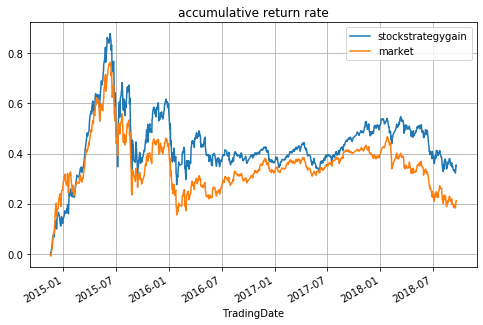

In [63]:
df_group[['stockstrategygain','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

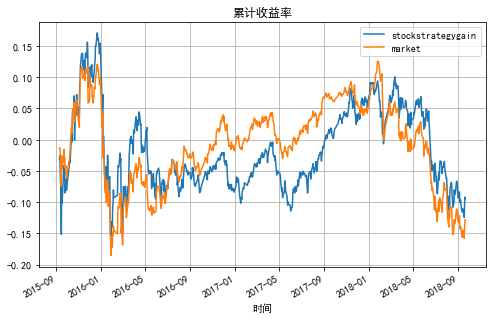

In [182]:
df_group[200:][['stockstrategygain','market']].cumsum().plot(grid=True,figsize=(8, 5),title='累计收益率')
plt.xlabel('时间')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.show()

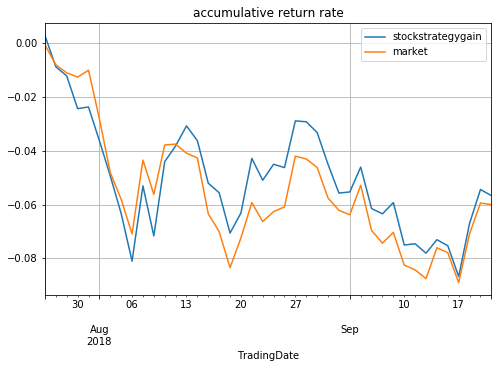

In [175]:
df_group[900:][['stockstrategygain','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

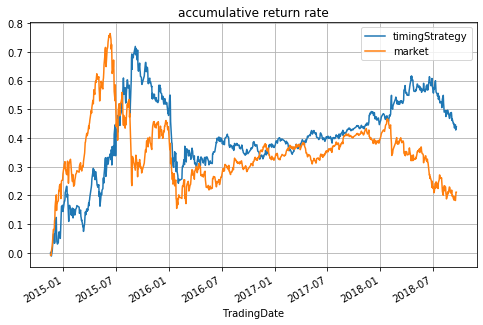

In [64]:
df_group[['timingStrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

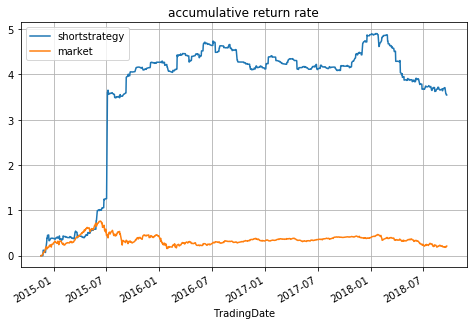

In [119]:
df_group[['shortstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

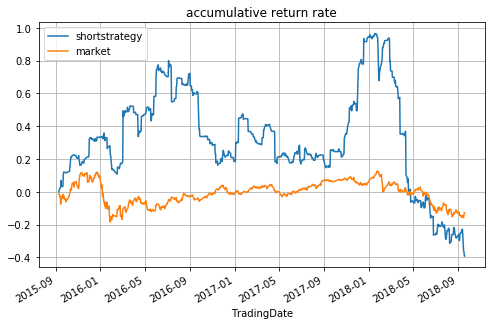

In [171]:
df_group[200:][['shortstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

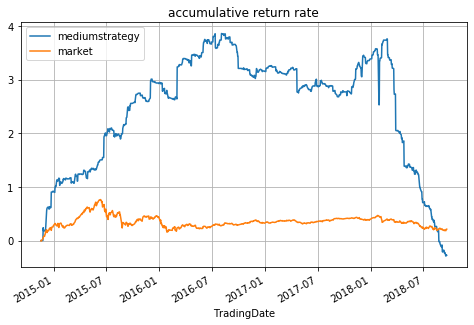

In [140]:
df_group[['mediumstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

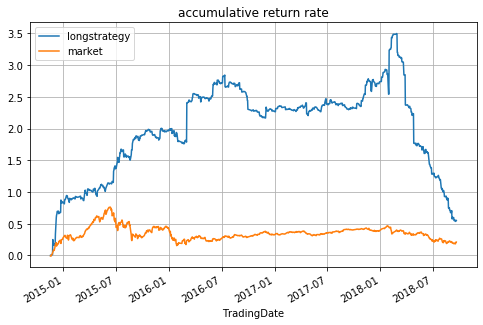

In [141]:
df_group[['longstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

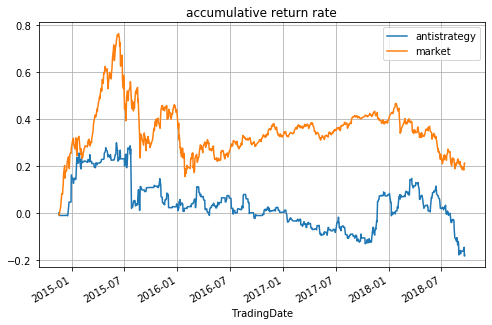

In [159]:
df_group[['antistrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

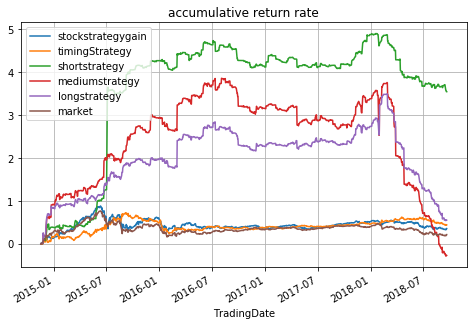

In [160]:
df_group[['stockstrategygain','timingStrategy','shortstrategy','mediumstrategy','longstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

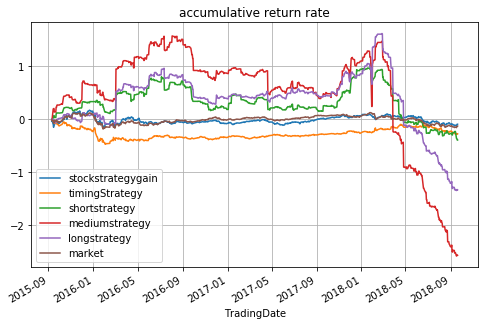

In [172]:
df_group[200:][['stockstrategygain','timingStrategy','shortstrategy','mediumstrategy','longstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

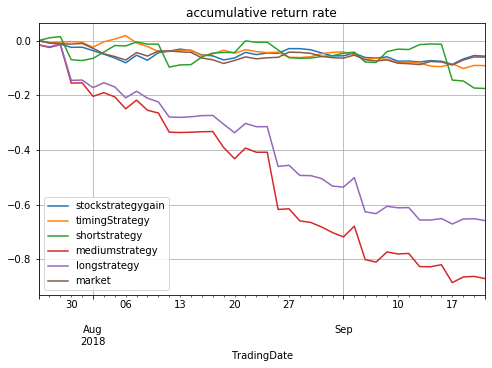

In [173]:
df_group[900:][['stockstrategygain','timingStrategy','shortstrategy','mediumstrategy','longstrategy','market']].cumsum().plot(grid=True,figsize=(8, 5),title='accumulative return rate')

In [161]:
outputfile1='./df1.xlsx'
df1.to_excel(outputfile1)
outputfile2='./df_group.xlsx'
df_group.to_excel(outputfile2)